In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [2]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs

In [3]:
data = load_iris()
data.keys()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [5]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [6]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters= k,random_state= 42)
y_pred = kmeans.fit_predict(X)

In [7]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [8]:
print(kmeans.labels_)
y_pred is kmeans.labels_

[4 0 1 ... 2 1 0]


True

In [9]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [10]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

# to see distacence from the centroid to instaces use Transform method

u can see that the smallest distances is a choice.

In [11]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

# Using Clustering for Image segmentations

In [12]:
from matplotlib.image import imread

In [13]:
image = imread('/home/valens/Pictures/ladybug.png')

FileNotFoundError: [Errno 2] No such file or directory: '/home/valens/Pictures/ladybug.png'

In [ ]:
image.shape

In [ ]:
X = image.reshape(-1,3)
k = 8
kmeans = KMeans(n_clusters= k,random_state= 42).fit(X)

In [14]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [15]:
print(kmeans.cluster_centers_[kmeans.labels_].shape)
kmeans.cluster_centers_[kmeans.labels_]

(2000, 2)


array([[-2.80037642,  1.30082566],
       [-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       ...,
       [-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999]])

In [16]:
kmeans.labels_.shape

(2000,)

In [17]:
533 * 800

426400

In [18]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

In [19]:
print(kmeans.transform(X).shape)
kmeans.transform(X)

(2000, 5)


array([[0.46779778, 3.04611916, 1.45402521, 1.54944305, 0.11146795],
       [0.07122059, 3.11541584, 0.99002955, 1.48612753, 0.51431557],
       [3.81713488, 1.32016676, 4.09069201, 2.67154781, 3.76340605],
       ...,
       [0.92830156, 3.04886464, 0.06769209, 1.40795651, 1.42865797],
       [3.10300136, 0.14895409, 3.05913478, 1.71125   , 3.23385668],
       [0.22700281, 2.8625311 , 0.85434589, 1.21678483, 0.67518173]])

In [20]:
print(np.unique(kmeans.labels_))
kmeans.labels_

[0 1 2 3 4]


array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [21]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

NameError: name 'image' is not defined

In [22]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

NameError: name 'image' is not defined

NameError: name 'image' is not defined

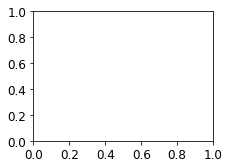

In [23]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

# Using Clustering for Preprocessing

In [24]:
from sklearn.datasets import load_digits

In [25]:
X_digits,y_digits = load_digits(return_X_y= True)

In [26]:
help(load_digits)

Help on function load_digits in module sklearn.datasets.base:

load_digits(n_class=10, return_X_y=False)
    Load and return the digits dataset (classification).
    
    Each datapoint is a 8x8 image of a digit.
    
    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============
    
    Read more in the :ref:`User Guide <digits_dataset>`.
    
    Parameters
    ----------
    n_class : integer, between 0 and 10, optional (default=10)
        The number of classes to return.
    
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, 

In [27]:
X_digits.shape

(1797, 64)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_digits,y_digits)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_reg = LogisticRegression(solver='lbfgs',multi_class='ovr',max_iter=5000,random_state=42)

In [32]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
log_reg.score(X_test,y_test)

0.9688888888888889

In [34]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(
    [
    ('kmeans',KMeans(n_clusters = 50)),
    ('log_reg',LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
    ]
    )

In [35]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [36]:
pipeline.score(X_test,y_test)

0.98

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(pipeline,param_grid ,cv =3,verbose = 2)

In [39]:
grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

KeyboardInterrupt: 

In [40]:
print(grid_clf.best_params_)
grid_clf.score(X_test,y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Using Clustering for Semi-Supervised Learning

In [41]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
log_reg.score(X_test,y_test)

0.8333333333333334

In [43]:
k  = 50
kmeans = KMeans(n_clusters = k,random_state= 42)

In [44]:
X_digits_dist = kmeans.fit_transform(X_train)
print(X_digits_dist.shape)
X_digits_dist[:3]

(1347, 50)


array([[31.33905994, 41.96889871, 39.35726202, 42.40981717, 44.61166459,
        48.18806744, 45.32546197, 38.61872926, 49.29623259, 56.33420118,
        30.3917992 , 44.8159616 , 43.52214707, 43.12529102, 56.27087576,
        50.86204251, 52.75366957, 51.47832951, 40.49915824, 54.01277627,
        48.19882762, 40.51434449, 42.40717417, 41.0105779 , 41.59268185,
        47.33575405, 44.61228224, 45.48980689, 35.79222927, 50.68198815,
        47.56015927, 38.09933014, 56.30325224, 32.21555084, 46.82577347,
        44.80981948, 35.10500048, 51.91008996, 41.85089204, 48.11745272,
        38.05510624, 51.48219757, 45.35671763, 36.86124131, 37.76742797,
        41.72780931, 49.97279872, 52.16098656, 43.01099731, 47.0563954 ],
       [55.92396284, 43.71133883, 54.31262046, 49.09363691, 38.15582896,
        40.30697637, 41.78953511, 58.07098745, 47.2315219 , 21.65199503,
        45.48803643, 41.48967933, 49.93805026, 39.1711237 , 20.3734662 ,
        59.04012908, 37.41590107, 46.27889754, 52.

In [45]:
representative_digit_idx = np.argmin(X_digits_dist,axis = 0)# center of centroid
representative_digit_idx.shape

(50,)

In [46]:
X_representative_digits = X_train[representative_digit_idx]

Saving figure representative_images_diagram


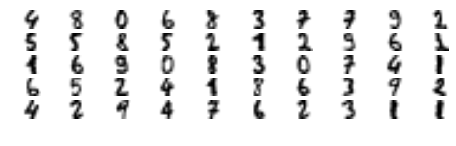

In [47]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [48]:
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])


In [49]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
log_reg.score(X_test,y_test)

0.9222222222222223

In [51]:
logreg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

In [52]:
logreg.fit(X_representative_digits,y_representative_digits)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
logreg.score(X_test,y_test)

0.9222222222222223

## Label Prapogations

In [54]:
y_train_prapogated = np.empty(len(X_train),dtype = np.int32)
y_train_prapogated

array([          1,           0,  1304636304, ..., -2095050752,
        1056077492, -2020655104], dtype=int32)

In [55]:
print(kmeans.labels_.shape)
kmeans.labels_

(1347,)


array([10, 14, 26, ..., 41, 44, 48], dtype=int32)

In [56]:
for i in range(k):
    y_train_prapogated[kmeans.labels_ == i] = y_representative_digits[i]
y_train_prapogated

array([5, 2, 0, ..., 2, 7, 1], dtype=int32)

In [57]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42) 

In [58]:
log_reg.fit(X_train,y_train_prapogated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
log_reg.score(X_test,y_test)

0.9333333333333333

# prapogate only 20 % instances closest to the centroid

In [60]:
percentile_closest = 20
kmeans.labels_.shape,len(X_train)

((1347,), 1347)

In [61]:
X_cluster_dist = X_digits_dist[np.arange(len(X_train)),kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i) # TRUE False index for  the label data of the cluster
    cluster_dist = X_cluster_dist[in_cluster] # select labels of data  
    cutoff_distance = np.percentile(cluster_dist,percentile_closest)# 20 percentile value
    above_cutoff = (X_cluster_dist > cutoff_distance) # index of  X_cluster whoses above the cutoff distance
    X_cluster_dist[in_cluster & above_cutoff] = -1
    

In [62]:
partially_prapogated = (X_cluster_dist != -1)
X_train_partially_prapogated = X_train[partially_prapogated]
y_train_partally_prapogated = y_train[partially_prapogated]

In [63]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_prapogated,y_train_partally_prapogated)
log_reg.score(X_test,y_test)

0.9466666666666667

In [64]:
np.mean(y_train_partally_prapogated == y_train[partially_prapogated])

1.0

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [66]:
X,y = make_moons(n_samples= 1000,noise= 0.05)

In [67]:
dbscan = DBSCAN(eps= 0.05,min_samples= 5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [68]:
dbscan.labels_

array([ 2,  0,  1,  2,  3,  3,  2,  1,  3,  3,  0,  3,  3,  1, -1,  1,  1,
        1,  1,  3,  0,  1, -1,  2,  2,  1,  1,  0,  1,  1,  2,  3,  4,  1,
        1, -1,  3,  1,  1,  1,  3,  3,  0,  0,  2,  2,  0, -1,  3,  2,  3,
        2,  3,  3,  0,  0,  3,  2,  1,  3,  5,  2,  0,  7,  2,  0,  4,  2,
        2,  0,  3,  1,  1,  2,  4,  3,  3, -1,  3, -1,  0,  0,  1,  0,  2,
        2,  0, -1,  0,  0,  0, -1,  0,  1,  1,  2,  3,  3,  3,  1, -1,  1,
        3,  0,  2, -1, -1,  3,  0,  1,  2,  3,  1,  2,  5,  3,  3,  1,  2,
        4, -1,  3,  3,  2,  0,  0,  2,  3,  3,  0,  1,  3,  3,  0,  2,  1,
        2,  3,  3,  1,  0,  2,  5,  1,  2,  4,  0,  2,  1,  3,  3,  1,  0,
        1,  0,  1,  3,  3,  1,  0,  1,  3,  3, -1,  1,  3,  2,  2,  3, -1,
        1,  3,  4,  2,  1,  3,  3,  1,  3,  1,  2,  1,  1,  4,  3,  1,  3,
        3,  4, -1,  1,  0,  3,  1,  1,  1,  0,  1,  7,  3,  1,  1,  1, -1,
        1,  1,  3,  3,  2,  3,  0,  3,  3,  3,  3,  2,  1,  2,  1,  4,  3,
       -1,  3,  3,  2,  3

In [69]:
len(dbscan.core_sample_indices_)

801

In [70]:
dbscan.components_

array([[ 1.92240464e+00, -3.51142952e-03],
       [ 1.31015229e+00, -4.80232584e-01],
       [-9.76379043e-01,  3.89635809e-01],
       ...,
       [-3.08201544e-04,  1.03883723e+00],
       [ 6.40355970e-01, -4.42050237e-01],
       [ 2.12105819e-01,  1.06073598e+00]])

In [71]:
X

array([[-8.13311363e-01,  3.87962788e-01],
       [ 1.92240464e+00, -3.51142952e-03],
       [ 1.31015229e+00, -4.80232584e-01],
       ...,
       [-3.08201544e-04,  1.03883723e+00],
       [ 6.40355970e-01, -4.42050237e-01],
       [ 2.12105819e-01,  1.06073598e+00]])

In [72]:
X1,X2 = X[:,0],X[:,1]

In [73]:
plt.scatter(X1,X2)
plt.

SyntaxError: invalid syntax (<ipython-input-73-c05892534efb>, line 2)

In [74]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


Saving figure dbscan_plot


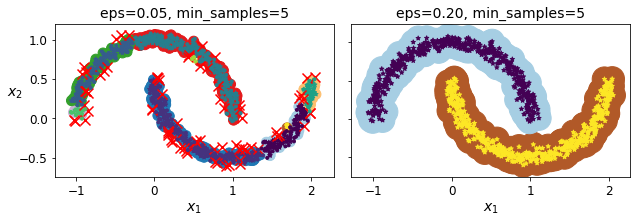

In [75]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

# Gaussin Mixture

In [79]:
X1,y1 = make_blobs(n_samples= 1000,centers= ((4,-4),(0,0)),random_state= 42)
X1  = X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2,y2 = make_blobs(n_samples= 250,centers = 1 ,random_state= 42)
X2 = X2 + [6,-8]
X = np.r_[X1,X2]
y = np.r_[y1,y2]

In [80]:
from sklearn.mixture import GaussianMixture

In [81]:
gm = GaussianMixture(n_components= 3, n_init= 10,random_state= 42)
gm.fit(X)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [82]:
gm.weights_

array([0.20965228, 0.4000662 , 0.39028152])

In [83]:
gm.covariances_

array([[[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

In [84]:
gm.means_

array([[ 3.39909717,  1.05933727],
       [-1.40763984,  1.42710194],
       [ 0.05135313,  0.07524095]])

In [85]:
gm.converged_

True

In [86]:
gm.n_iter_

4

In [88]:
gm.predict(X)

array([2, 2, 1, ..., 0, 0, 0])

In [89]:
gm.predict_proba(X)

array([[2.32389467e-02, 6.77397850e-07, 9.76760376e-01],
       [1.64685609e-02, 6.75361303e-04, 9.82856078e-01],
       [2.01535333e-06, 9.99923053e-01, 7.49319577e-05],
       ...,
       [9.99999571e-01, 2.13946075e-26, 4.28788333e-07],
       [1.00000000e+00, 1.46454409e-41, 5.12459171e-16],
       [1.00000000e+00, 8.02006365e-41, 2.27626238e-15]])

In [90]:
X_new,y_new = gm.sample(6)

In [91]:
X_new

array([[ 2.95400315,  2.63680992],
       [-1.16654575,  1.62792705],
       [-1.39477712, -1.48511338],
       [ 0.27221525,  0.690366  ],
       [ 0.54095936,  0.48591934],
       [ 0.38064009, -0.56240465]])

In [92]:
X

array([[ 0.81672911,  1.32719052],
       [ 0.28671649,  1.30485269],
       [-1.89804675, -0.00869803],
       ...,
       [ 3.00543883,  1.09616027],
       [ 4.63362519,  1.76621916],
       [ 3.58847848,  0.24127634]])

In [93]:
X1

array([[ 0.81672911,  1.32719052],
       [ 0.28671649,  1.30485269],
       [-1.89804675, -0.00869803],
       ...,
       [-0.6384584 ,  2.03202156],
       [-1.37328012, -1.74808556],
       [-1.22397356,  2.59592324]])

In [96]:
X

array([[ 0.81672911,  1.32719052],
       [ 0.28671649,  1.30485269],
       [-1.89804675, -0.00869803],
       ...,
       [ 3.00543883,  1.09616027],
       [ 4.63362519,  1.76621916],
       [ 3.58847848,  0.24127634]])

In [97]:
gm.score_samples(X)

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

In [98]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities,4)

In [99]:
anomalies = X[densities < density_threshold]

In [104]:
np.shape(anomalies) ,len(X)

((50, 2), 1250)